In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 1000)

Reading CSV and setting timeseries as index.

In [82]:
# df=pd.read_csv('../data/df_cleaned.csv')
df=pd.read_csv('../data/df_cleaned_year.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index("datetime",inplace=True)

/var/folders/dr/684wtygx16jdkrv3syzbcvg40000gn/T/ipykernel_91777/4228124792.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../data/df_cleaned_year.csv')


Method to plot dataframes

In [83]:
def plot_eda(df,title,save,ylabe="Station"):
    # Initialize the matplotlib figure   
    f, ax = plt.subplots(figsize=(6, 15))
    f.tight_layout()
    # Plot
    kwargs = {'alpha':0.85}
    sns.set_color_codes("pastel")
    sns.barplot(x="exits_abs", y=df.index, data=df,label="Exits", color="r", **kwargs,ax=ax)
    sns.barplot(x="entries_abs", y=df.index, data=df,label="Entries", color="b",**kwargs)
    ax.set_title(title,fontsize=16)
    ax.set_xlabel('Passengers', fontsize = 16)
    ax.set_ylabel(ylabe, fontsize = 16)
    ax.legend(fontsize = 16)
    # plt.subplots_adjust(bottom=0.15,left=0.3,right=3)

    plt.savefig(f"../resources/{save}.jpg",bbox_inches="tight")
    return f,ax;


Getting top and bottom ten station by passengers amount.

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Top stations by entries'}, xlabel='Passengers', ylabel='Station'>)

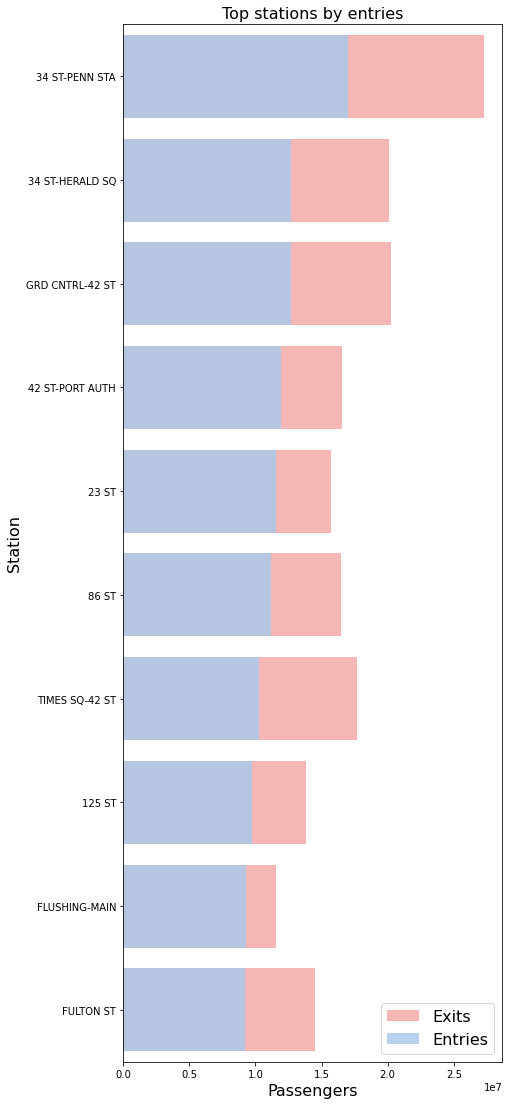

In [84]:
entries_top=df.groupby("station").agg("sum").sort_values(by="entries_abs",ascending=False).head(10)
plot_eda(entries_top,"Top stations by entries","entries_top")

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Bottom stations by entries'}, xlabel='Passengers', ylabel='Station'>)

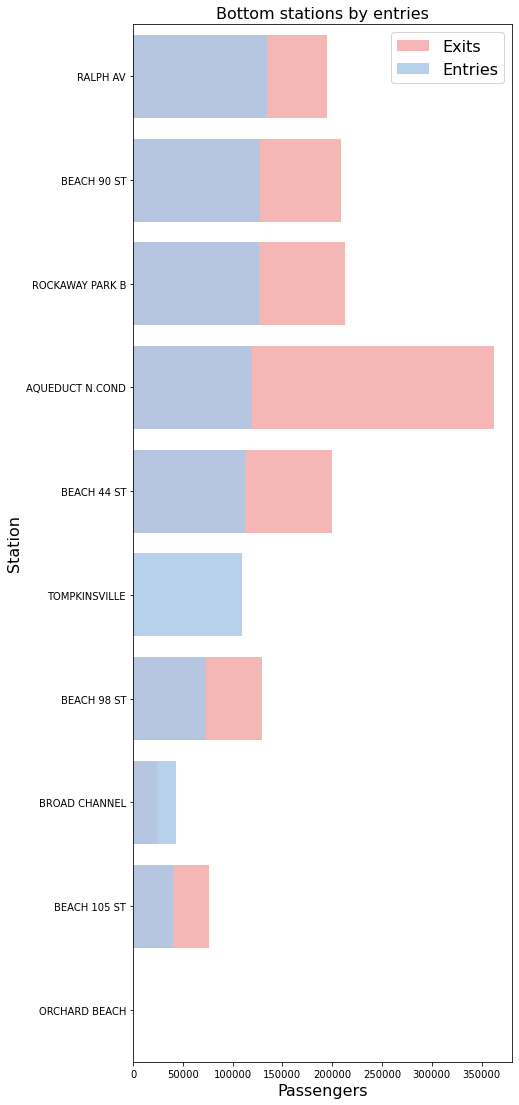

In [85]:
entries_bottom=df.groupby("station").agg("sum").sort_values(by="entries_abs",ascending=False).tail(10)
plot_eda(entries_bottom,"Bottom stations by entries","entries_bottom")

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Top stations by exits'}, xlabel='Passengers', ylabel='Station'>)

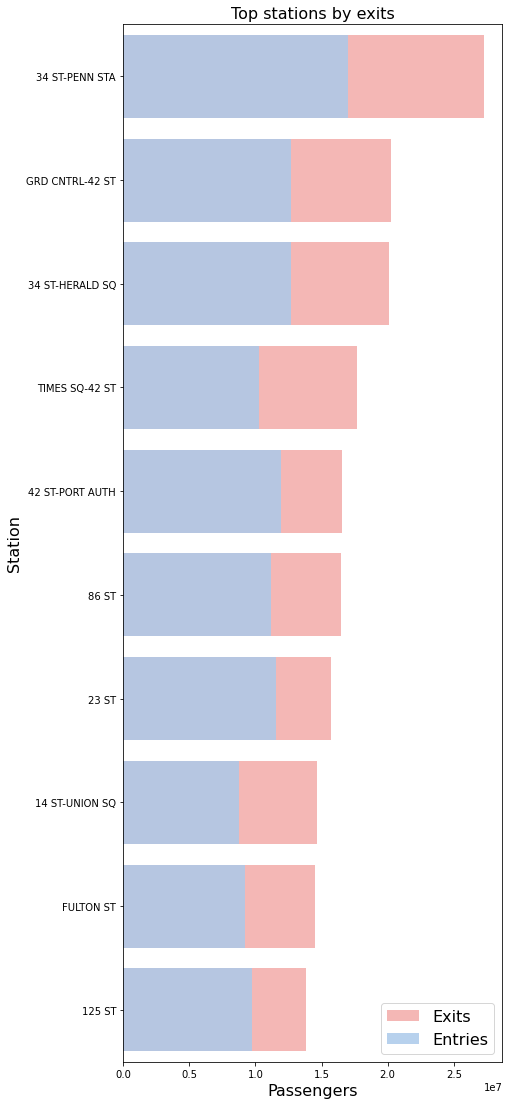

In [86]:
exits_top=df.groupby("station").agg("sum").sort_values(by="exits_abs",ascending=False).head(10)
plot_eda(exits_top,"Top stations by exits","exits_top")

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Bottom stations by exits'}, xlabel='Passengers', ylabel='Station'>)

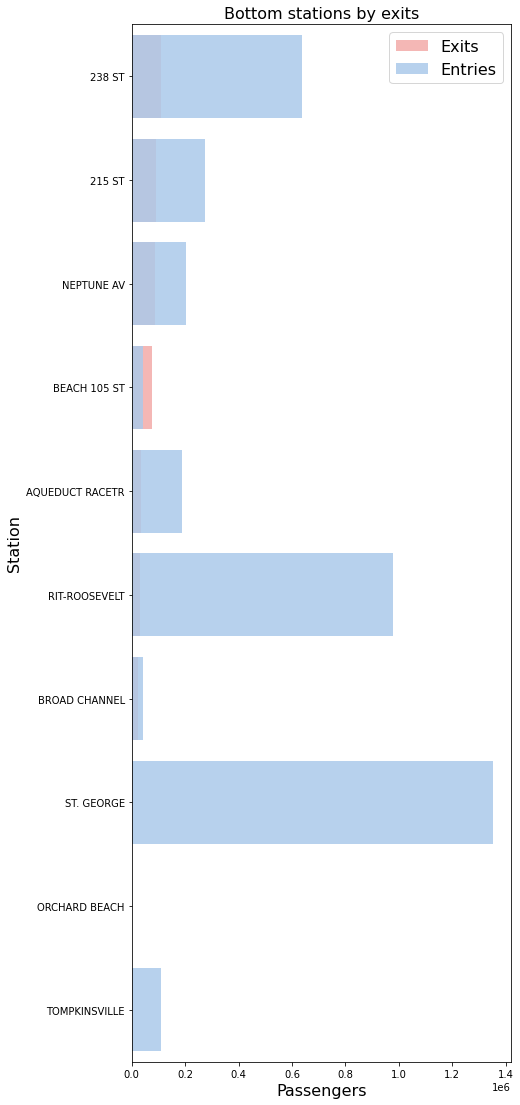

In [87]:
exits_bottom=df.groupby("station").agg("sum").sort_values(by="exits_abs",ascending=False).tail(10)

plot_eda(exits_bottom,"Bottom stations by exits","exits_bottom")

In [88]:
df[df["station"]=="TOMPKINSVILLE"].head()

,stat_id,unit,scp,station,linename,entries_abs,exits_abs,weekday
datetime,,,,,,,,
2021-10-16 06:00:00,TOMPKINSVILLE 00-00-00 S102,R165,00-00-00,TOMPKINSVILLE,1,1,0,Saturday
2021-10-16 10:00:00,TOMPKINSVILLE 00-00-00 S102,R165,00-00-00,TOMPKINSVILLE,1,24,0,Saturday
2021-10-16 14:00:00,TOMPKINSVILLE 00-00-00 S102,R165,00-00-00,TOMPKINSVILLE,1,14,0,Saturday
2021-10-16 18:00:00,TOMPKINSVILLE 00-00-00 S102,R165,00-00-00,TOMPKINSVILLE,1,10,0,Saturday
2021-10-16 22:00:00,TOMPKINSVILLE 00-00-00 S102,R165,00-00-00,TOMPKINSVILLE,1,3,0,Saturday


Mean amount of people per line daily.

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Top line per entries'}, xlabel='Passengers', ylabel='Station'>)

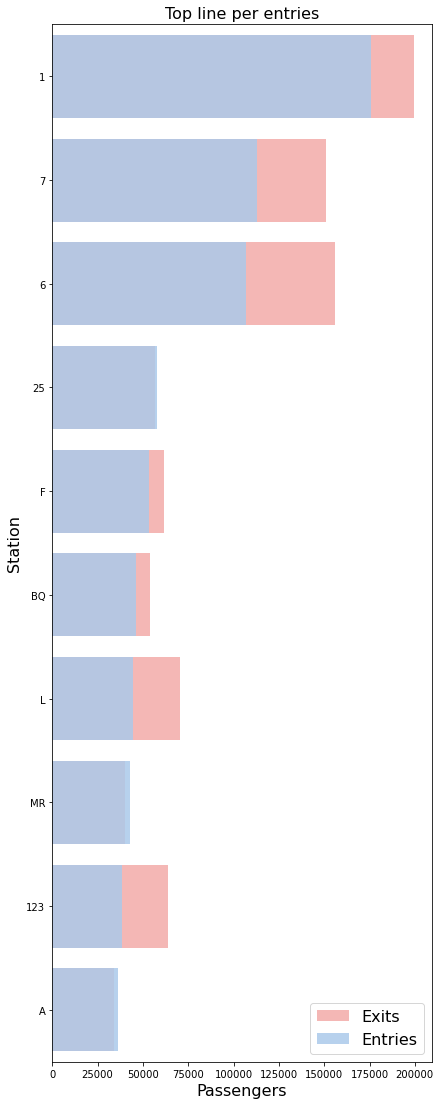

In [89]:
entries_line=df.groupby([df.index.floor("d"),"linename"]).sum().groupby("linename").mean().sort_values(by="entries_abs",ascending=False).head(10)
plot_eda(entries_line,"Top line per entries","line_top")

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Bottom line per entries'}, xlabel='Passengers', ylabel='Station'>)

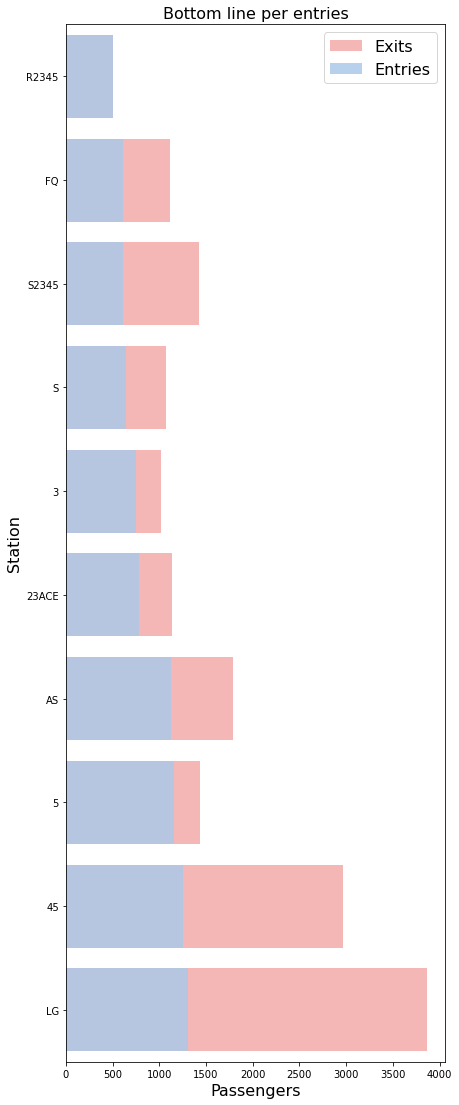

In [90]:
entries_line=df.groupby([df.index.floor("d"),"linename"]).sum().groupby("linename").mean().sort_values(by="entries_abs",ascending=True).head(10)
plot_eda(entries_line,"Bottom line per entries","line_bottom")

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Bottom line per exits'}, xlabel='Passengers', ylabel='Station'>)

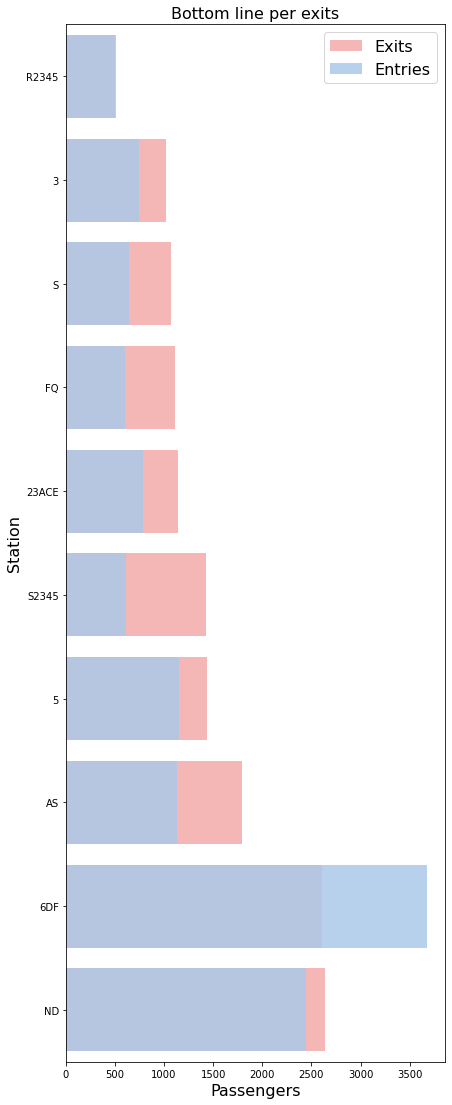

In [91]:
exits_line=df.groupby([df.index.floor("d"),"linename"]).sum().groupby("linename").mean().sort_values(by="exits_abs",ascending=True).head(10)
plot_eda(exits_line,"Bottom line per exits","line_bottom_exits")

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Top line per exits'}, xlabel='Passengers', ylabel='Station'>)

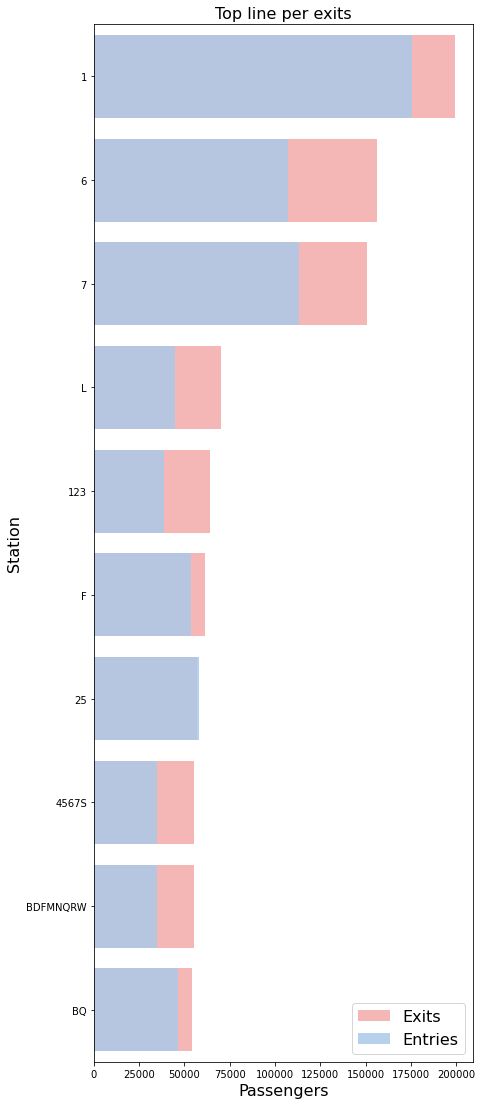

In [92]:
exits_line_top=df.groupby([df.index.floor("d"),"linename"]).sum().groupby("linename").mean().sort_values(by="exits_abs",ascending=False).head(10)
plot_eda(exits_line_top,"Top line per exits","line_top_exits")

Amount of people per day for the whole subway

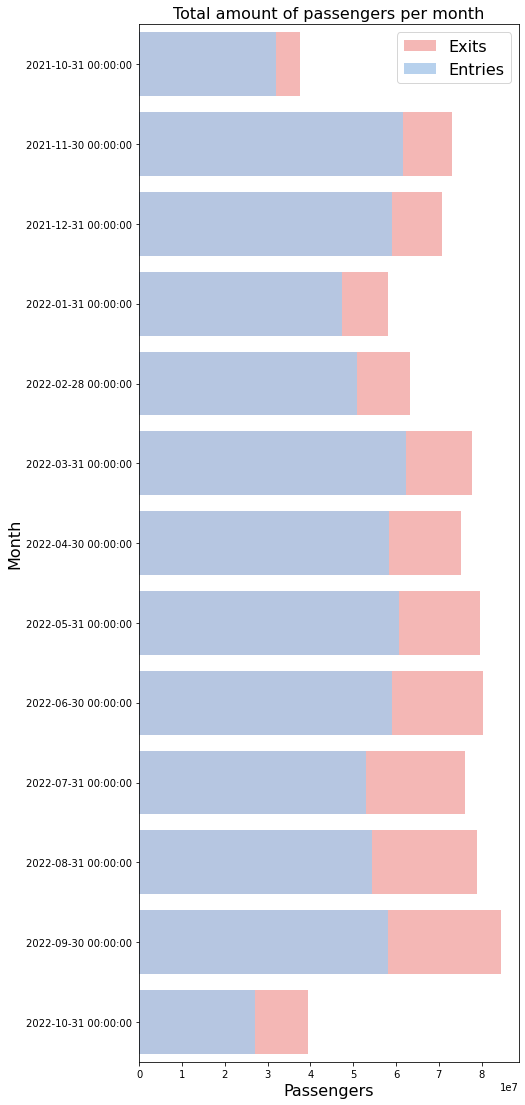

In [93]:

plot_eda(df.resample("M").sum().sort_index(),"Total amount of passengers per month","subway_amount","Month");


In [78]:
df.head()

,stat_id,unit,scp,station,linename,entries_abs,exits_abs,weekday
datetime,,,,,,,,
2021-10-16 04:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,17,240,Saturday
2021-10-16 08:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,22,176,Saturday
2021-10-16 12:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,74,376,Saturday
2021-10-16 16:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,108,550,Saturday
2021-10-16 20:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,167,635,Saturday


(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Amount of passengers per day'}, xlabel='Passengers', ylabel='Day'>)

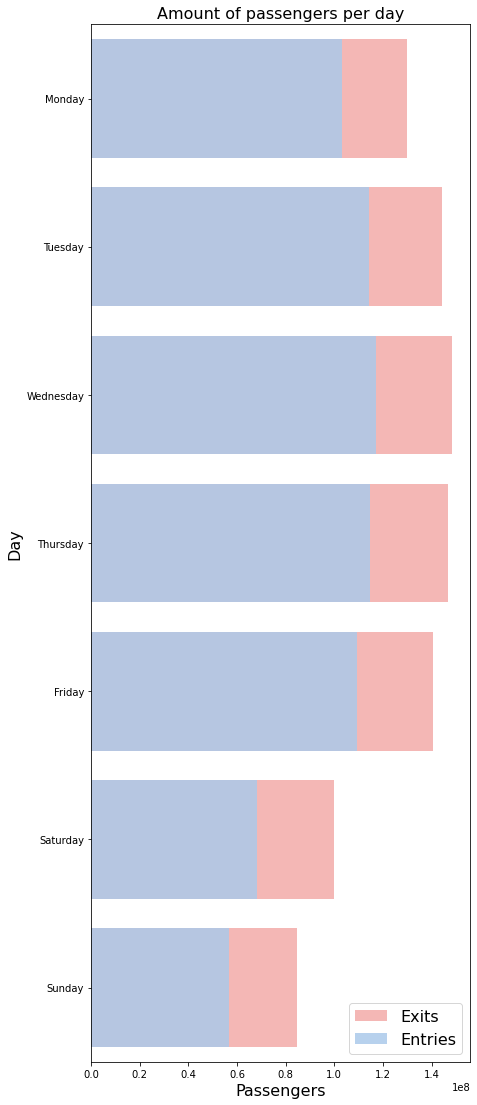

In [102]:
cats = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
by_day=df.groupby("weekday").sum().sort_index()
by_day['name_sort'] = by_day.index.map(cats)
plot_eda(by_day.sort_values(by="name_sort"),"Amount of passengers per day","Day_name","Day")



Subway load per hour

In [42]:
df.groupby(df.index.floor("4h")).sum()

,entries_abs,exits_abs
datetime,,
2022-10-01 00:00:00,217180,421256
2022-10-01 04:00:00,47753,117461
2022-10-01 08:00:00,136437,159887
2022-10-01 12:00:00,260248,401091
2022-10-01 16:00:00,353153,573126
2022-10-01 20:00:00,313320,577688
2022-10-02 00:00:00,154004,314165
2022-10-02 04:00:00,42777,106074
2022-10-02 08:00:00,100943,118948


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


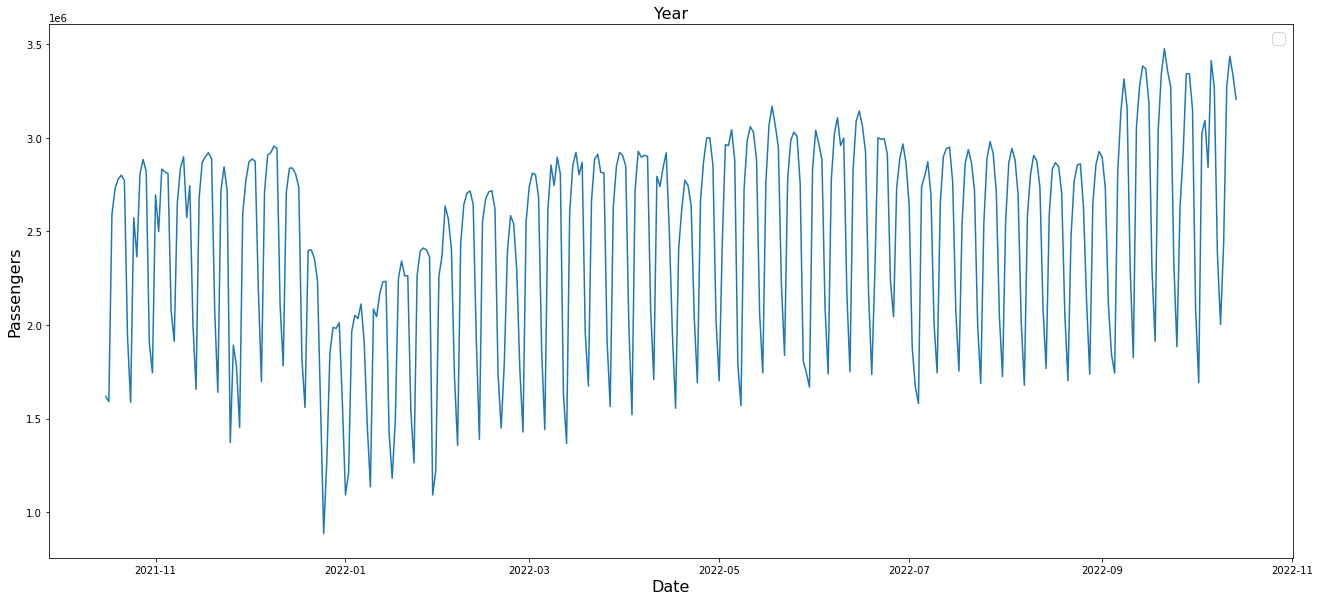

In [109]:

# Initialize the matplotlib figure   
f, ax = plt.subplots(figsize=(18, 8))
f.tight_layout()
# Plot
kwargs = {'alpha':0.85}
sns.set_color_codes("pastel")
sns.lineplot(data = df.groupby(df.index.floor("d")).sum()["exits_abs"],ax=ax)
# sns.barplot(x="exits_abs", y=df.index, data=df,label="Exits", color="r", **kwargs,ax=ax)
# sns.barplot(x="entries_abs", y=df.index, data=df,label="Entries", color="b",**kwargs)
ax.set_title("Year",fontsize=16)
ax.set_xlabel('Date', fontsize = 16)
ax.set_ylabel("Passengers", fontsize = 16)
ax.legend(fontsize = 16)
# plt.subplots_adjust(bottom=0.15,left=0.3,right=3)
# plt.savefig(f"../resources/{save}.jpg",bbox_inches="tight")



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


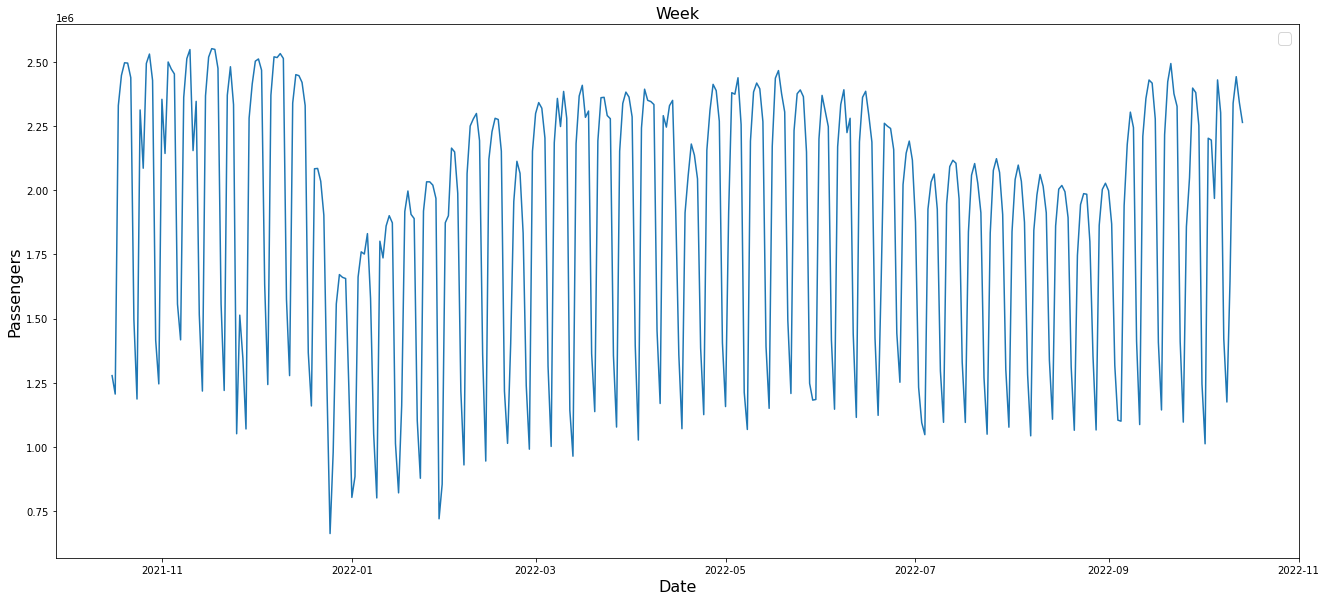

In [110]:
# Initialize the matplotlib figure   
f, ax = plt.subplots(figsize=(18, 8))
f.tight_layout()
# Plot
kwargs = {'alpha':0.85}
sns.set_color_codes("pastel")
sns.lineplot(data = df.groupby(df.index.floor("d")).sum()["entries_abs"],ax=ax)
# sns.barplot(x="exits_abs", y=df.index, data=df,label="Exits", color="r", **kwargs,ax=ax)
# sns.barplot(x="entries_abs", y=df.index, data=df,label="Entries", color="b",**kwargs)
ax.set_title("Week",fontsize=16)
ax.set_xlabel('Date', fontsize = 16)
ax.set_ylabel("Passengers", fontsize = 16)
ax.legend(fontsize = 16)
# plt.subplots_adjust(bottom=0.15,left=0.3,right=3)
# plt.savefig(f"../resources/{save}.jpg",bbox_inches="tight")